<a href="https://colab.research.google.com/github/moh3azzam/Data-Analysis/blob/master/european_soccer_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate a Dataset (European Soccer Database)


## Table of Contents
- <a href='#Introduction'>Introduction</a>
- <a href='#Assessing-&-Cleaning'>Assessing and Cleaning</a>
    - <a href='#Country-Dataset'> Country Dataset </a>
    - <a href='#League-Dataset'> League Dataset </a>
    - <a href='#Match-Dataset'> Match Dataset </a>
    - <a href='#Player-Dataset'> Player Dataset </a>
    - <a href='#Player_attr-Dataset'> Player_attr Dataset </a>
    - <a href='#Team-Dataset'> Team Dataset </a>
    - <a href='#Team_attr-Dataset'> Team_attr Dataset </a>
- <a href='#Exploratory-Data-Analysis'>Exploratory Data Analysis</a>

## Introduction

**The ultimate Soccer database**

- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

In [ ]:
import sqlite3
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-whitegrid')

In [ ]:
con = sqlite3.connect('../input/soccer/database.sqlite')
df_country = pd.read_sql_query("SELECT * FROM Country", con)
df_league = pd.read_sql_query("SELECT * FROM League", con)
df_match = pd.read_sql_query("SELECT * FROM Match", con)
df_player = pd.read_sql_query("SELECT * FROM Player", con)
df_player_attr = pd.read_sql_query("SELECT * FROM Player_Attributes", con)
df_team = pd.read_sql_query("SELECT * FROM Team", con)
df_team_attr = pd.read_sql_query("SELECT * FROM Team_Attributes", con)

## Assessing-&-Cleaning

### Country-Dataset

In [ ]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [ ]:
df_country['name']

0         Belgium
1         England
2          France
3         Germany
4           Italy
5     Netherlands
6          Poland
7        Portugal
8        Scotland
9           Spain
10    Switzerland
Name: name, dtype: object

## League Dataset

In [ ]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [ ]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [ ]:
df_league['name'].value_counts()

Belgium Jupiler League      1
France Ligue 1              1
Portugal Liga ZON Sagres    1
Germany 1. Bundesliga       1
Poland Ekstraklasa          1
Italy Serie A               1
England Premier League      1
Switzerland Super League    1
Spain LIGA BBVA             1
Netherlands Eredivisie      1
Scotland Premier League     1
Name: name, dtype: int64

In [ ]:
df_league['country_id'].duplicated().sum()

0

### Match-Dataset

In [ ]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [ ]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [ ]:
type(df_match['season'][0])

str

In [ ]:
df_match.isnull().sum()

id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

In [ ]:
def test(name, id):
    name = name.split()[0]
    return id, name 

league_id_name = df_league[['id', 'name']].apply(lambda x: test(x['name'], x['id']), axis=1)

dict(league_id_name.values)

{1: 'Belgium',
 1729: 'England',
 4769: 'France',
 7809: 'Germany',
 10257: 'Italy',
 13274: 'Netherlands',
 15722: 'Poland',
 17642: 'Portugal',
 19694: 'Scotland',
 21518: 'Spain',
 24558: 'Switzerland'}

In [ ]:
df_match['league_name'] = df_match['league_id'].map(dict(league_id_name.values))

In [ ]:
df_match['league_name'].value_counts()

England        3040
France         3040
Spain          3040
Italy          3017
Netherlands    2448
Germany        2448
Portugal       2052
Poland         1920
Scotland       1824
Belgium        1728
Switzerland    1422
Name: league_name, dtype: int64

In [ ]:
df_match['season'].value_counts()

2008/2009    3326
2015/2016    3326
2014/2015    3325
2012/2013    3260
2010/2011    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: season, dtype: int64

In [ ]:
df_match['away_team_goal'].value_counts()

1    8989
0    8687
2    5146
3    2145
4     718
5     215
6      63
7      10
8       5
9       1
Name: away_team_goal, dtype: int64

In [ ]:
df_match.columns.values

array(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'aw

In [ ]:
df_match['home_player_1'].value_counts()

31293.0     149
41097.0     145
26295.0     142
42422.0     141
31465.0     141
           ... 
180284.0      1
38628.0       1
240338.0      1
268375.0      1
46130.0       1
Name: home_player_1, Length: 906, dtype: int64

### Player-Dataset

In [ ]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [ ]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [ ]:
df_player['birthday'] = pd.to_datetime(df_player['birthday'])

In [ ]:
df_player['birthday'].dt.year.value_counts()

1988    802
1989    723
1987    722
1986    710
1991    699
1990    696
1992    643
1984    607
1985    593
1983    541
1993    529
1982    487
1981    475
1994    462
1980    434
1979    345
1995    331
1978    263
1996    234
1977    191
1976    156
1975    113
1997    103
1974     77
1973     43
1998     24
1972     22
1971     12
1970     12
1969      6
1999      3
1967      1
1968      1
Name: birthday, dtype: int64

In [ ]:
df_player['age'] = (2016 - df_player['birthday'].dt.year)

In [ ]:
df_player['age'].value_counts()

28    802
27    723
29    722
30    710
25    699
26    696
24    643
32    607
31    593
33    541
23    529
34    487
35    475
22    462
36    434
37    345
21    331
38    263
20    234
39    191
40    156
41    113
19    103
42     77
43     43
18     24
44     22
45     12
46     12
47      6
17      3
49      1
48      1
Name: age, dtype: int64

In [ ]:
df_player['age'].min(),df_player['age'].max(), 

(17, 49)

In [ ]:
df_player['age'].mean()

29.357142857142858

In [ ]:
bin_edges = [16, 23, 30, 35, 40, 49] # Fill in this list with five values you just found
bin_names = ['17:23', '23:30', '30:35', '35:40', '40:49'] # Name each acidity level category

df_player['player_age_stage'] = pd.cut(df_player['age'], bin_edges, labels=bin_names, right=True)


In [ ]:
df_player['player_age_stage'].value_counts()

23:30    4995
30:35    2703
17:23    1686
35:40    1389
40:49     287
Name: player_age_stage, dtype: int64

### Player_attr-Dataset

In [ ]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [ ]:
df_player_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [ ]:
df_player_attr['date'] = pd.to_datetime(df_player_attr['date'])

In [ ]:
df_player_attr['season'] = df_player_attr['date'].dt.year

In [ ]:
df_player_attr.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,season
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


In [ ]:
player_name_id = dict(df_player[['player_api_id', 'player_name']].values)
df_player_attr['player_name'] = df_player_attr['player_api_id'].map(player_name_id)


### Team-Dataset

In [ ]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


### Team_attr-Dataset

In [ ]:
df_team_attr.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [ ]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [ ]:
team_short_name = dict(df_team[['team_api_id', 'team_long_name']].values)

In [ ]:
df_team_attr['team_long_name'] = df_team_attr['team_api_id'].map(team_short_name)

In [ ]:
df_team_attr['team_long_name'].value_counts()

Widzew Łódź             8
FC Basel                6
Catania                 6
Real Valladolid         6
West Bromwich Albion    6
                       ..
Falkirk                 1
KSV Roeselare           1
Leixões SC              1
FC Vaduz                1
Boavista FC             1
Name: team_long_name, Length: 285, dtype: int64

In [ ]:
df_team_attr['season'] = pd.to_datetime(df_team_attr['date']).dt.year

In [ ]:
team_group = df_team_attr.groupby(['season', 'team_long_name'])

## Exploratory-Data-Analysis


- #### Which leagues have the highest games ?

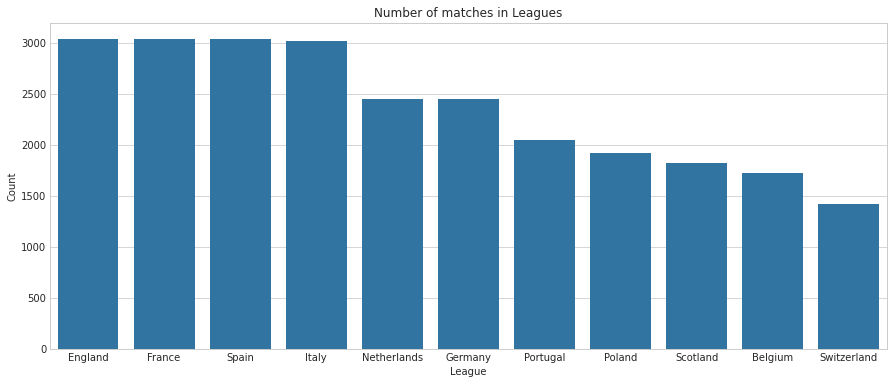

In [ ]:
base_color = sns.color_palette()[0]
cat_order = df_match['league_name'].value_counts().index
sns.countplot(data=df_match, x='league_name', order=cat_order, color=base_color)
plt.xlabel("League")
plt.ylabel("Count")
plt.title("Number of matches in Leagues")
plt.show()

- #### Which season have the highest games ?

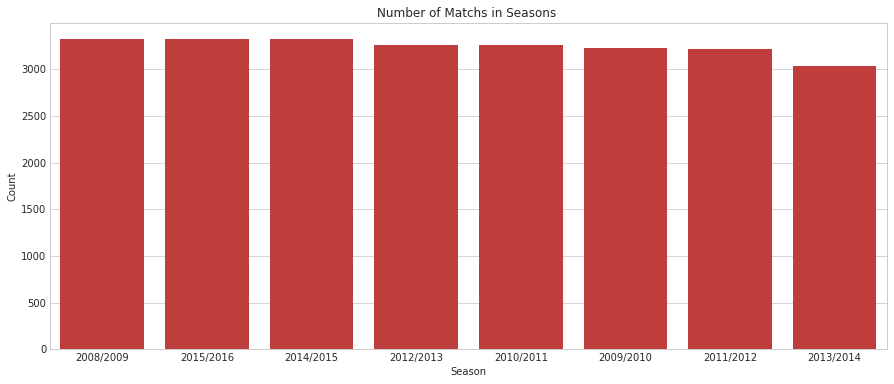

In [ ]:
base_color = sns.color_palette()[3]
cat_order = df_match['season'].value_counts().index
sns.countplot(data=df_match, x='season', order = cat_order, color=base_color)
plt.xlabel("Season")
plt.ylabel("Count")
plt.title("Number of Matchs in Seasons ")
plt.show()

- #### Who is the team that scores most the Away team or the Home team?

In [ ]:
df_match.head(2)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,league_name
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.2,Belgium
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6,Belgium


In [ ]:
melted = pd.melt(frame=df_match,id_vars='league_name',
                 value_vars=['away_team_goal', 'home_team_goal'])
melted

,league_name,variable,value
0,Belgium,away_team_goal,1
1,Belgium,away_team_goal,0
2,Belgium,away_team_goal,3
3,Belgium,away_team_goal,0
4,Belgium,away_team_goal,3
...,...,...,...
51953,Switzerland,home_team_goal,1
51954,Switzerland,home_team_goal,1
51955,Switzerland,home_team_goal,2
51956,Switzerland,home_team_goal,0


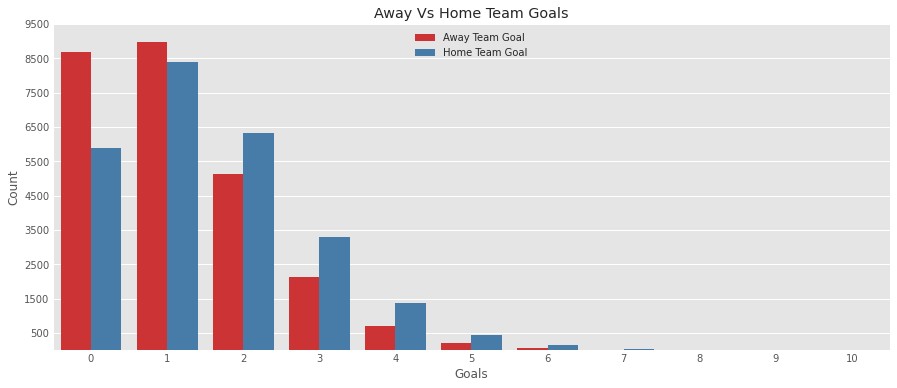

In [ ]:
palette = sns.color_palette('Set1')
sns.countplot(data=melted, x='value', hue='variable', palette=palette)
plt.xlabel('Goals')
plt.ylabel('Count')
plt.title('Away Vs Home Team Goals')
plt.legend(['Away Team Goal', 'Home Team Goal'])
plt.yticks(np.arange(500, 10000, 1000))
plt.show()

- #### What is the average of goals for both home and away team in every league?

In [ ]:
def estimator(x):
    return np.rint(np.mean(x))


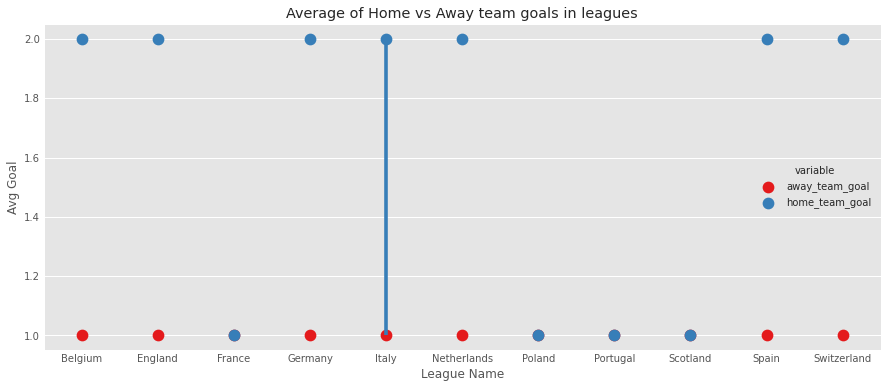

In [ ]:
palette = sns.color_palette('Set1')
sns.pointplot(data=melted, y='value', x='league_name', hue='variable', palette=palette,
             estimator=estimator, linestyles='')

plt.xlabel('League Name')
plt.ylabel('Avg Goal')
plt.title('Average of Home vs Away team goals in leagues')
plt.show()

- #### What is the count of age stages ?

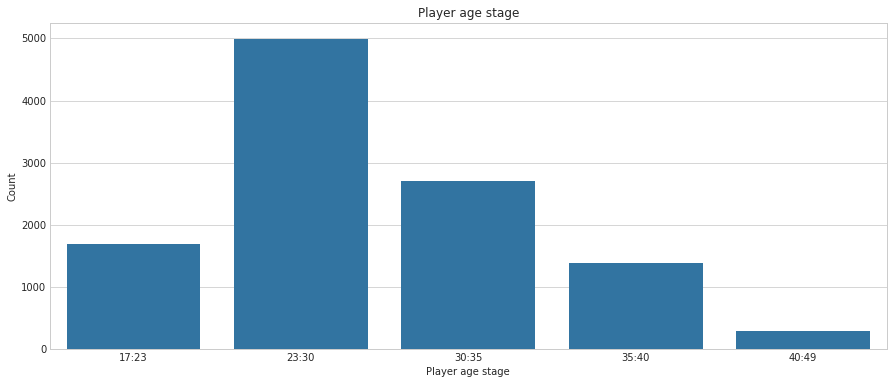

In [ ]:
base_color = sns.color_palette()[0]

sns.countplot(data=df_player, x='player_age_stage', color=base_color)
plt.xlabel('Player age stage')
plt.ylabel('Count')
plt.title('Player age stage')
plt.show()

- #### What is the age distribution?

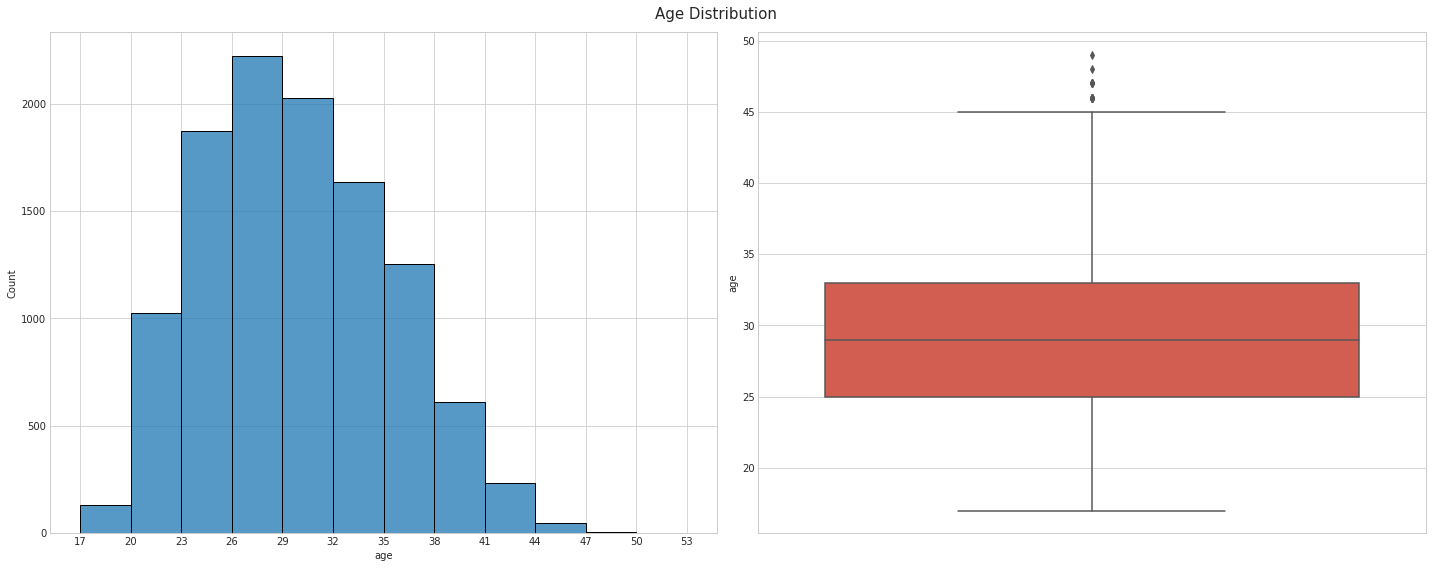

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
bin_edges = np.arange(df_player['age'].min(), df_player['age'].max()+5, 3)

sns.histplot(df_player['age'], bins=bin_edges)
plt.xticks(bin_edges)

plt.subplot(1,2,2)
sns.boxplot(data=df_player, y='age', color='#E74C3C')

plt.suptitle('Age Distribution', size=15)

plt.tight_layout()
plt.show()



- #### What is the distribution for both weight and height?

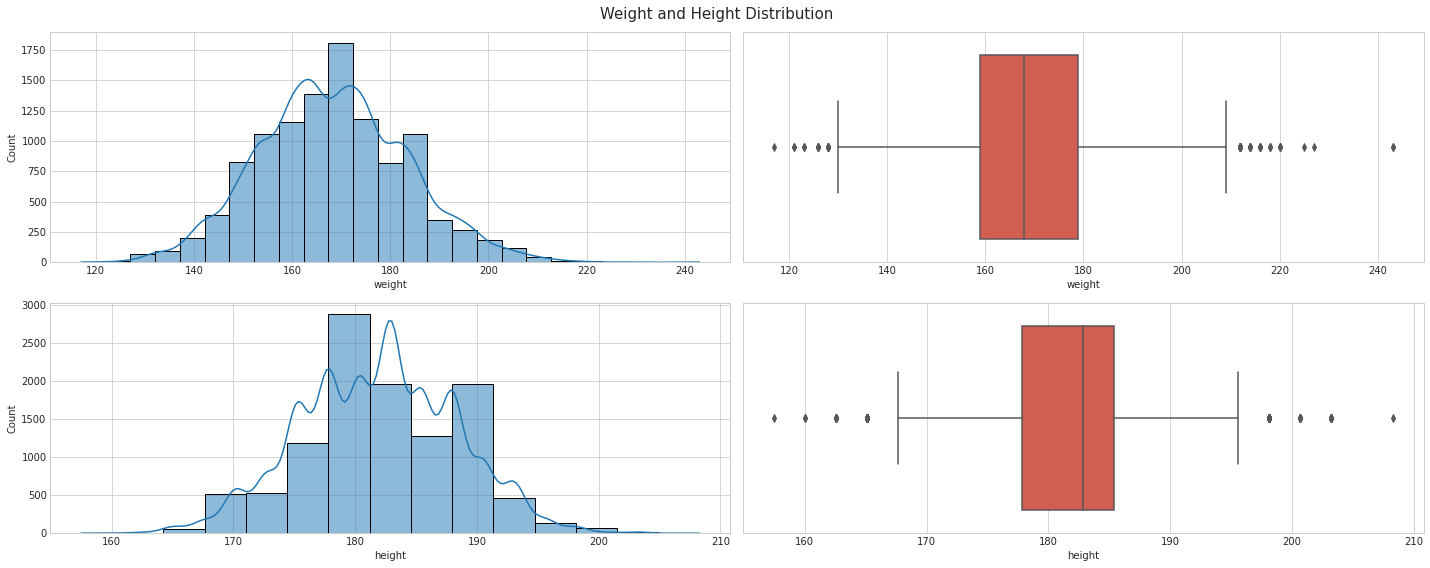

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.histplot(data=df_player, x='weight', bins=25,kde=True);

plt.subplot(2,2,3)
sns.histplot(data=df_player, x='height', bins=15, kde=True);

plt.subplot(2,2,2)
sns.boxplot(data=df_player, x='weight', color='#E74C3C');

plt.subplot(2,2,4)
sns.boxplot(data=df_player, x='height', color='#E74C3C');

plt.suptitle('Weight and Height Distribution', size=15)
plt.tight_layout()

plt.show()

- #### What is the percentile for both weight and height?

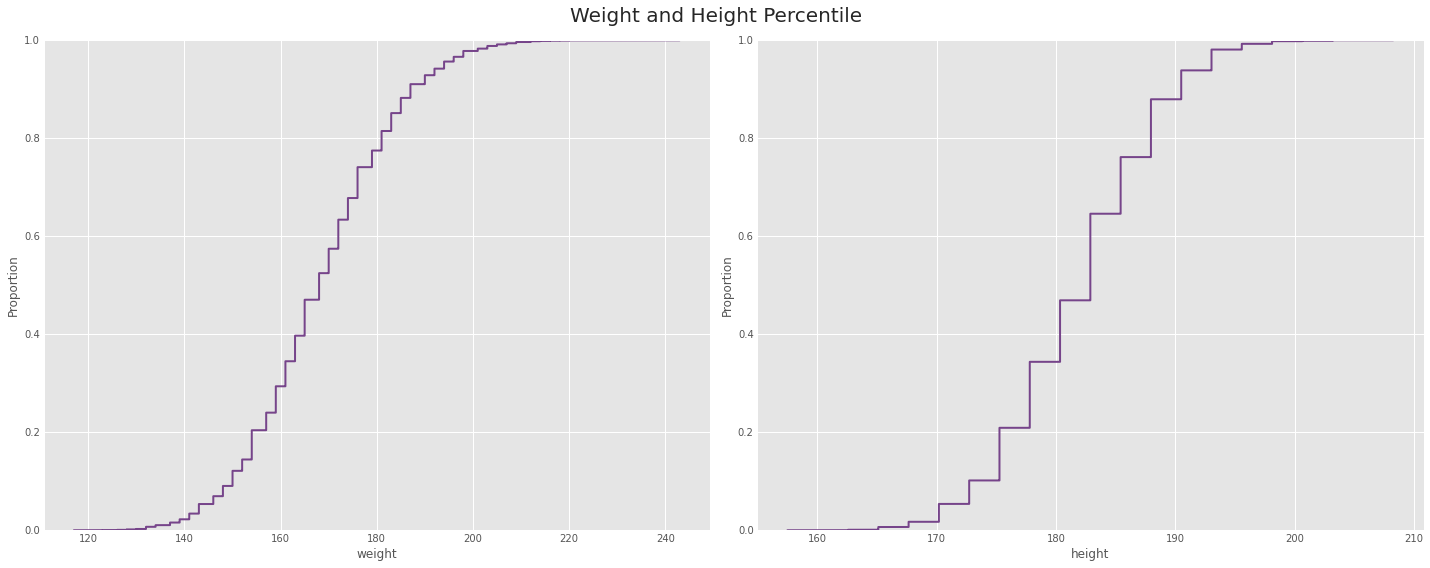

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.ecdfplot(df_player['weight'], color='#76448A');

plt.subplot(1,2,2)
sns.ecdfplot(df_player['height'], color='#76448A');

plt.suptitle('Weight and Height Percentile', size=20)
plt.tight_layout()
plt.show()

- #### if there are in relationship between height and weight?

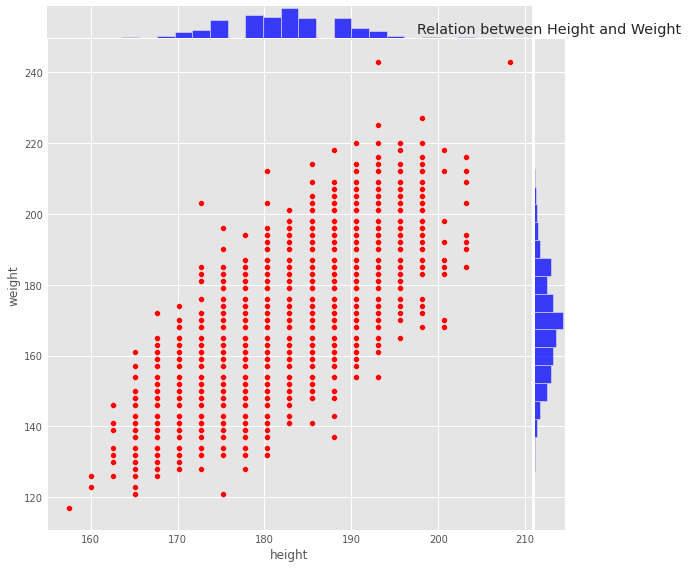

In [ ]:
g = sns.JointGrid(data = df_player, y = 'weight', x = 'height', ratio=15, space=.05, height=8,
                 )
g.plot_joint(sns.scatterplot, color='red')
g.plot_marginals(sns.histplot, bins=25, color='blue')
plt.title('Relation between Height and Weight');

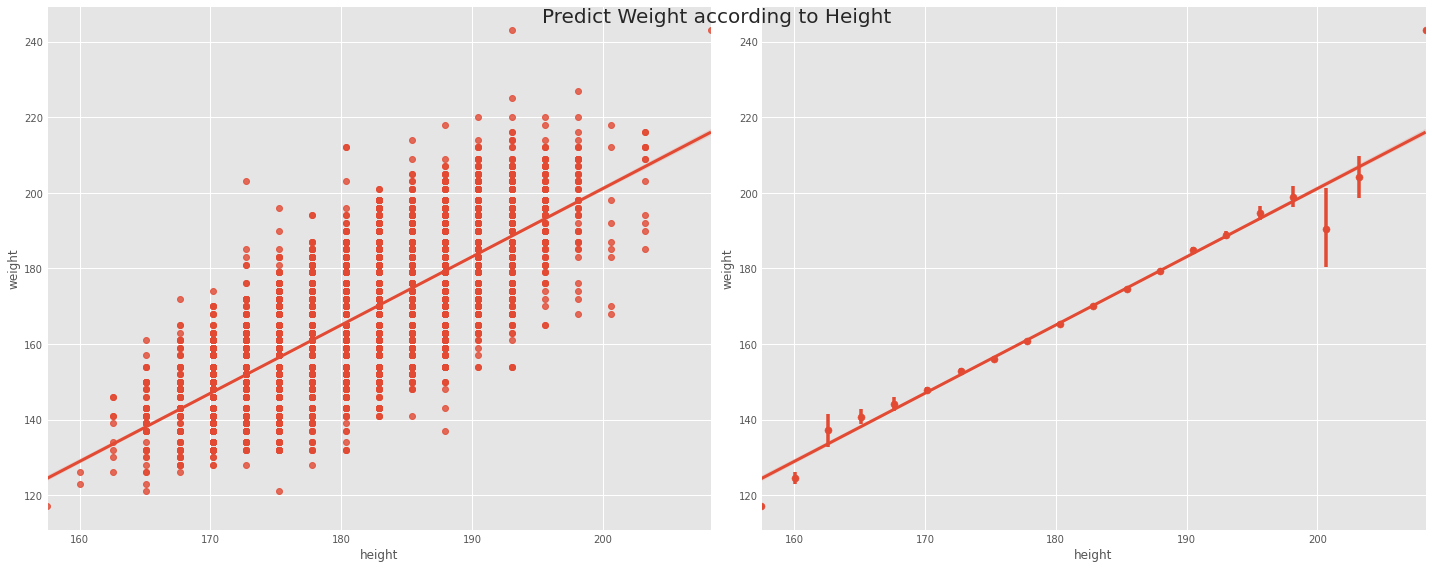

In [ ]:
plt.figure(figsize=(20,8))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.regplot(data=df_player, y='weight', x='height')

plt.subplot(1,2,2)
sns.regplot(data=df_player, y='weight', x='height', x_estimator=np.mean)

plt.tight_layout()
plt.suptitle('Predict Weight according to Height', size=20)
plt.show()

- #### Who is the top three players from 2007 to 2016

In [ ]:
group = df_player_attr.groupby(['season', 'player_name'])

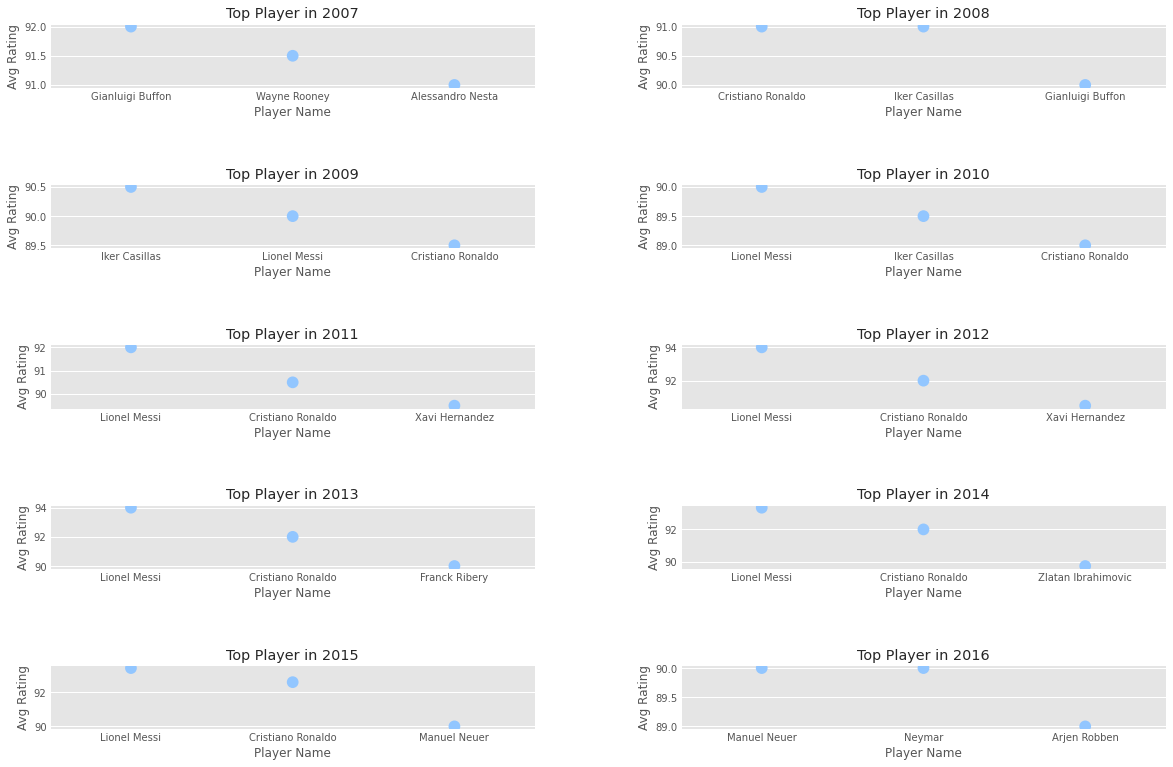

In [ ]:
overall_rating = group['overall_rating'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = overall_rating[(overall_rating.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg Rating')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)


- #### Who is the top three players in penalties from 2007 to 2016

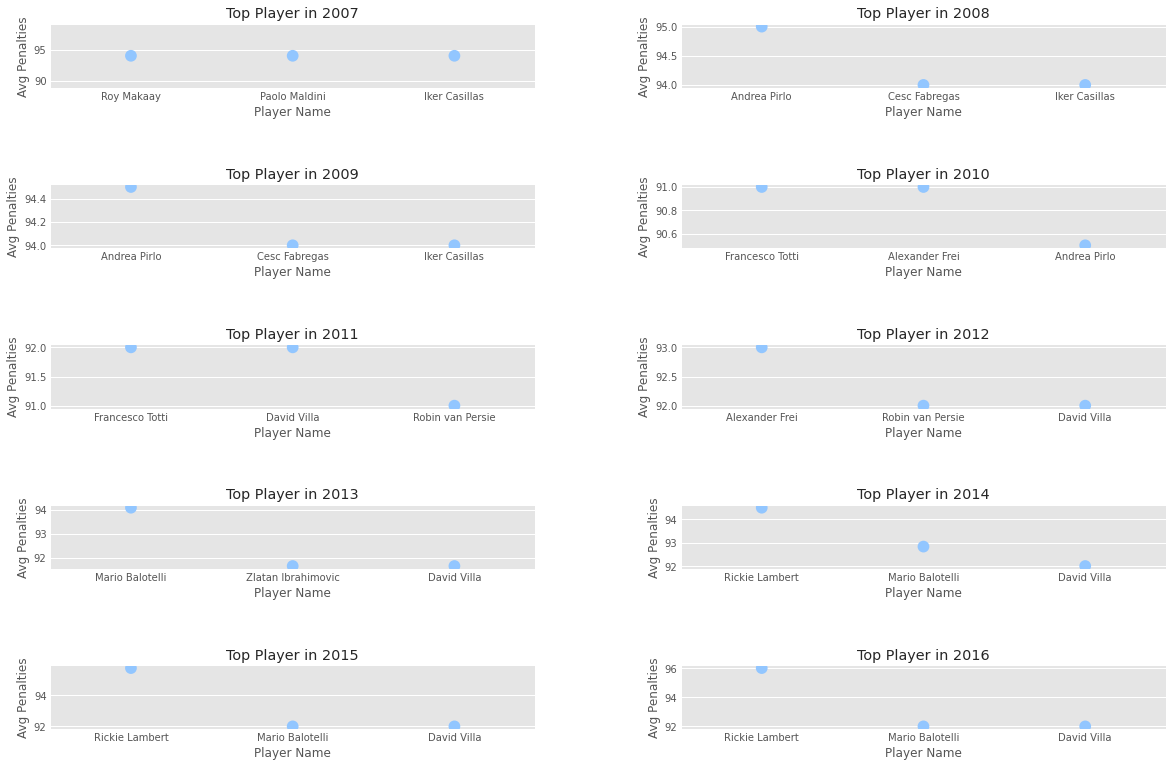

In [ ]:
penalties = group['penalties'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = penalties[(penalties.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg Penalties')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)


- #### Who is the top three players in finishing from 2007 to 2016

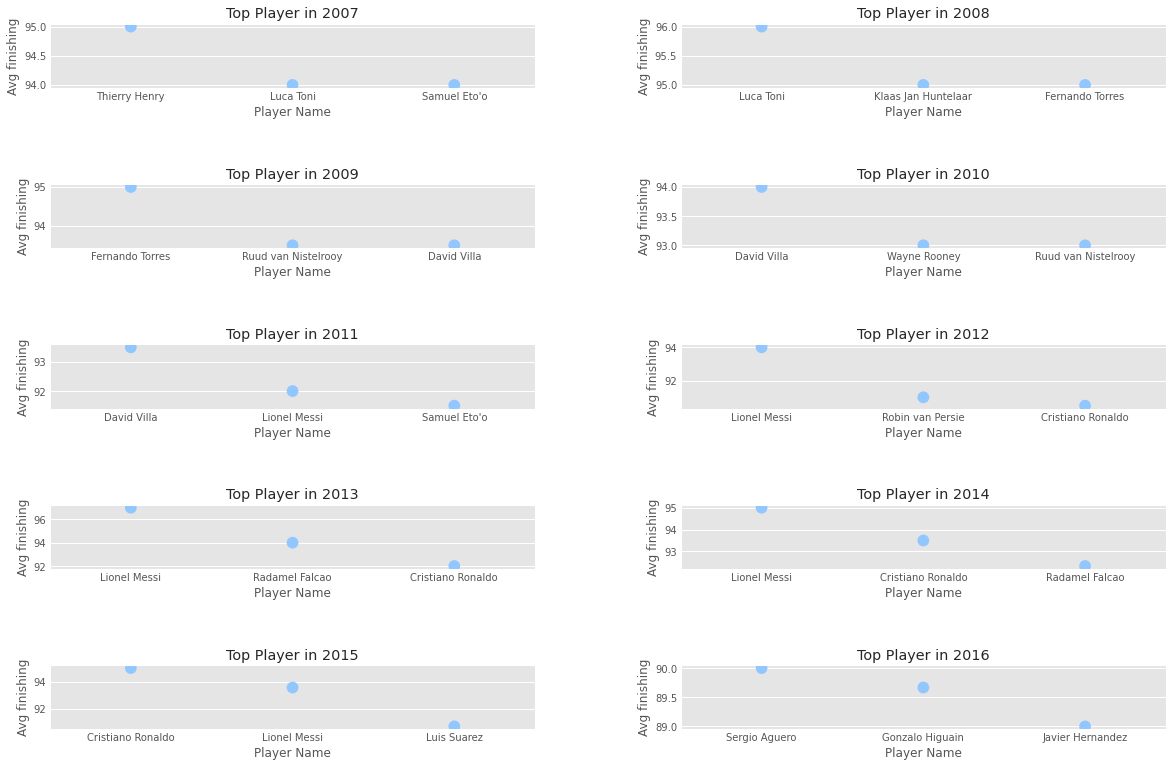

In [ ]:
finishing = group['finishing'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = finishing[(finishing.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg finishing')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)


- #### Who is the top three players in shot_power from 2007 to 2016

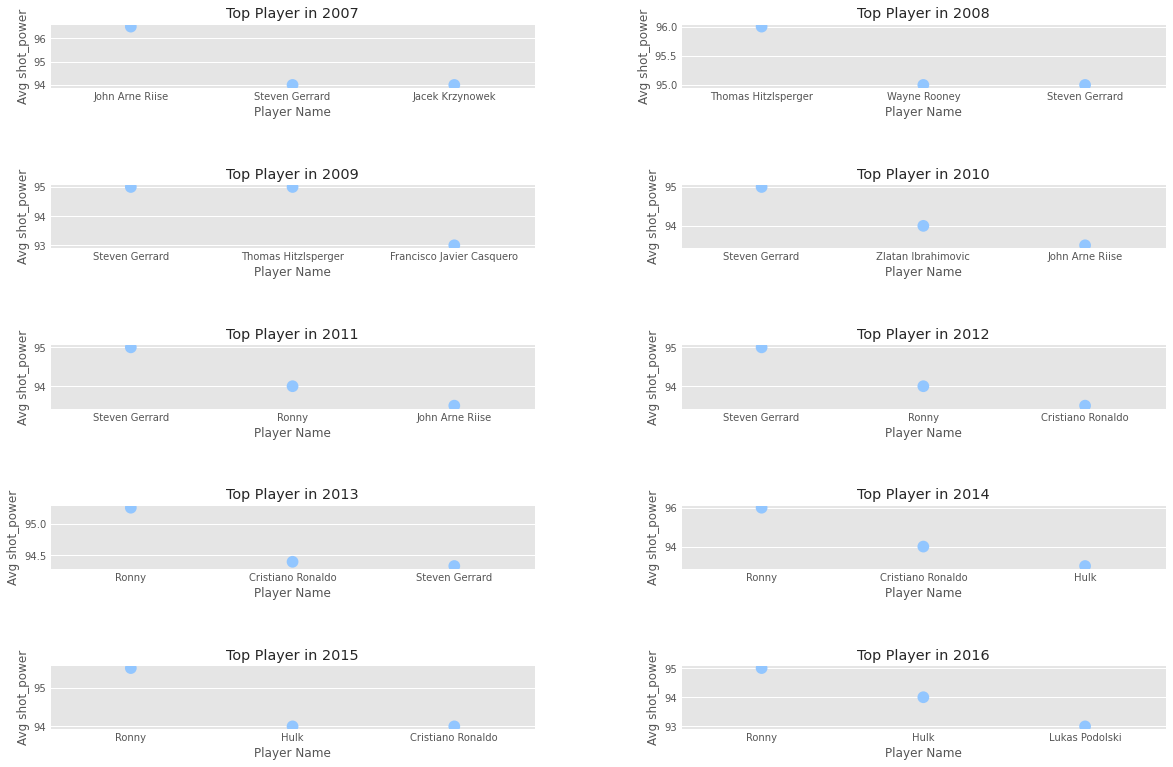

In [ ]:
shot_power = group['shot_power'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = shot_power[(shot_power.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg shot_power')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

- #### Who is the top three players in jumping from 2007 to 2016

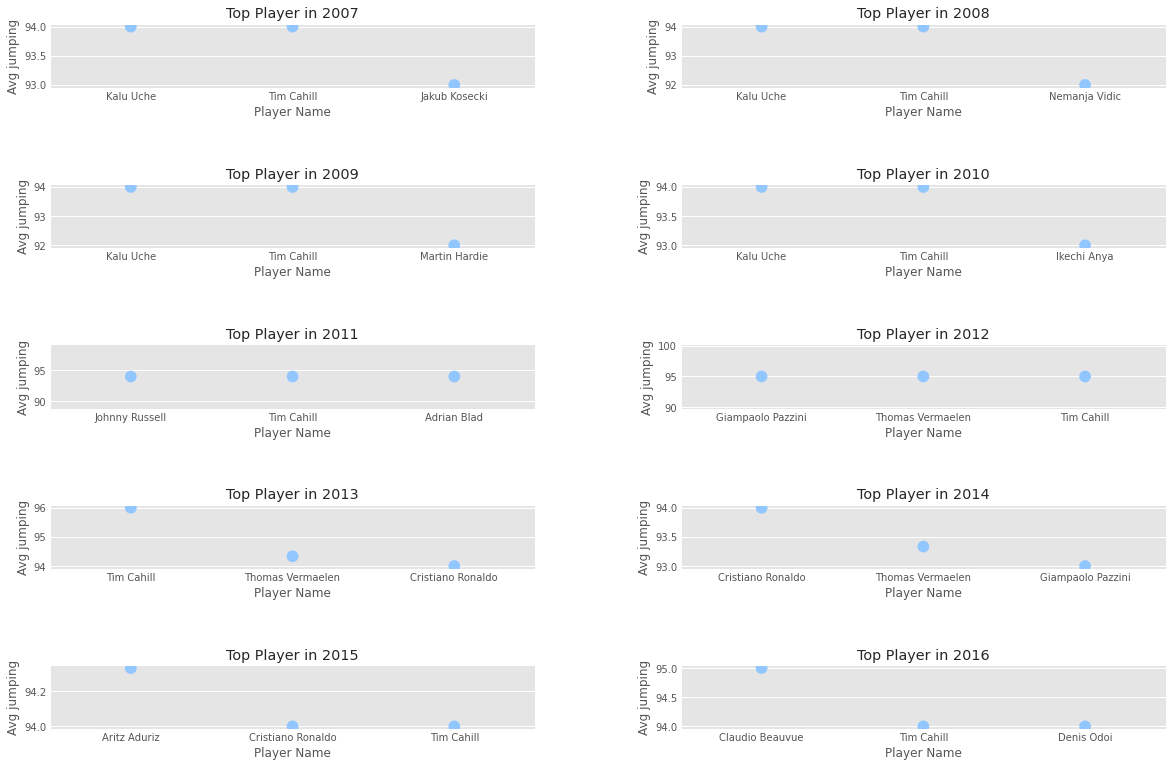

In [ ]:
jumping = group['jumping'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = jumping[(jumping.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg jumping')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

- #### Who is the top three players in ball_control from 2007 to 2016

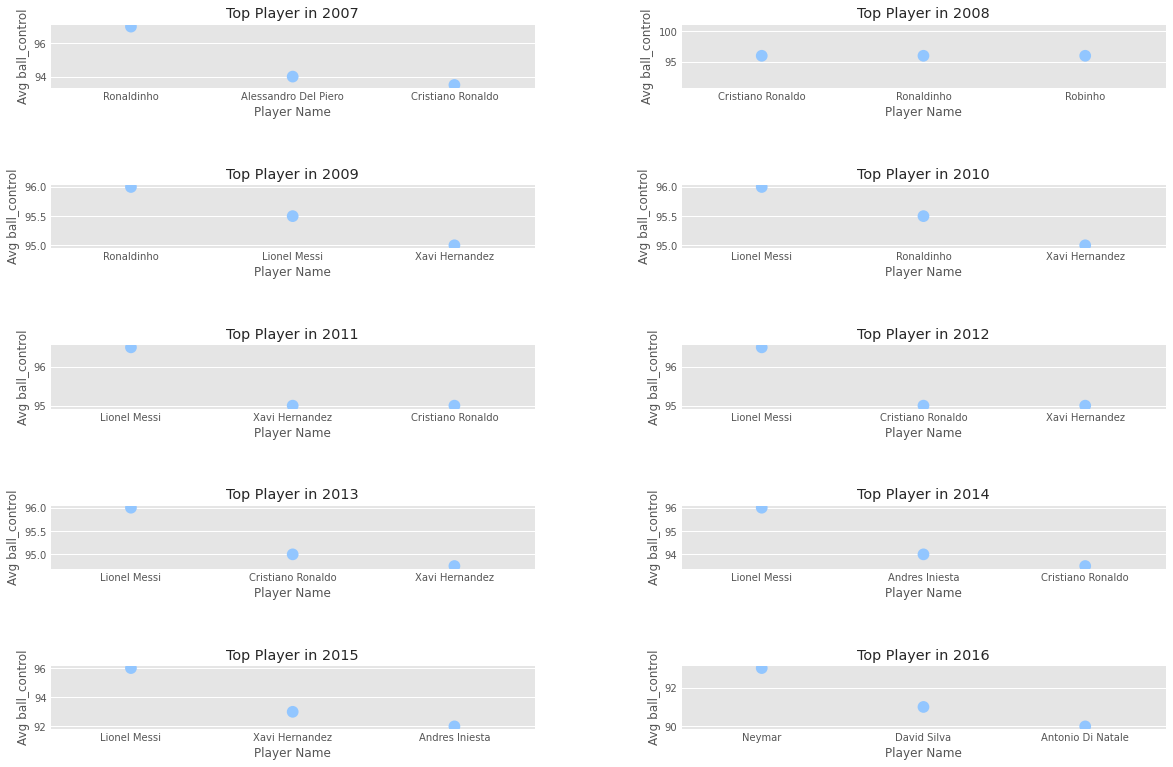

In [ ]:
ball_control = group['ball_control'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = ball_control[(ball_control.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg ball_control')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

- #### Who is the top three players in crossing from 2007 to 2016

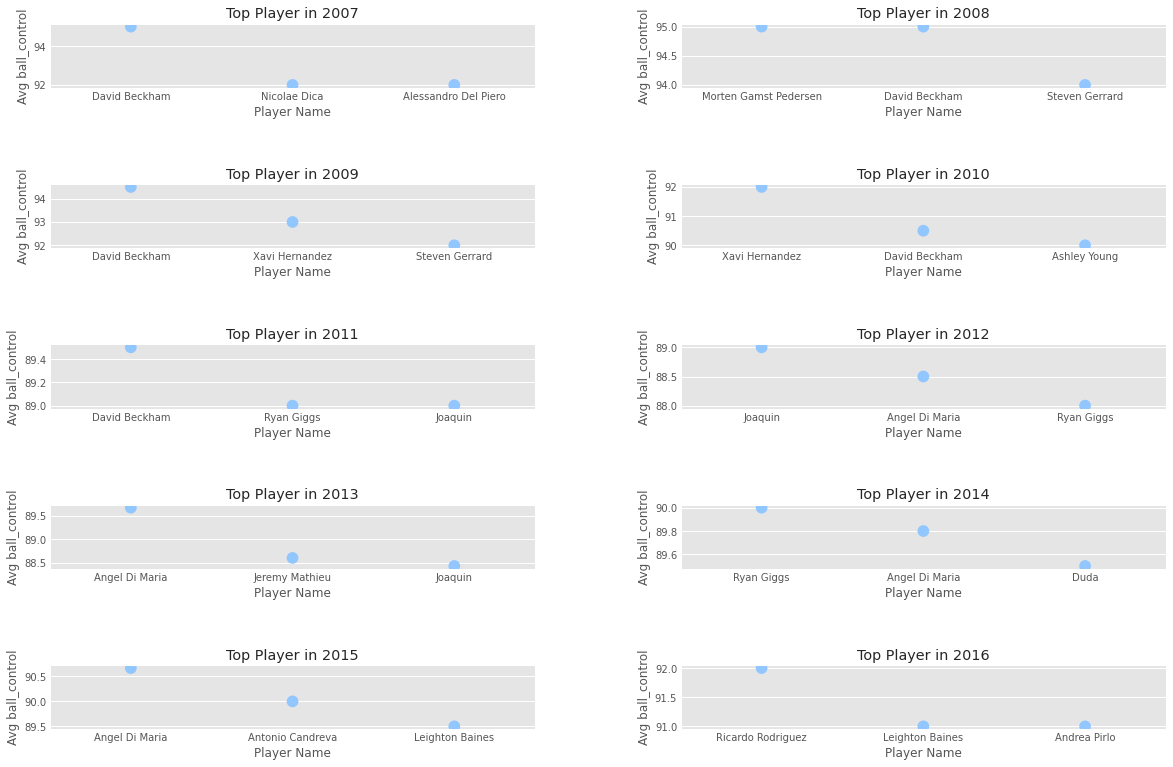

In [ ]:
crossing = group['crossing'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_player_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(5,2,i)
    x = crossing[(crossing.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Player Name')
    plt.ylabel('Avg ball_control')
    plt.title(f'Top Player in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)

- #### Who is the top three teams in buildUpPlaySpeed from 2007 to 2016

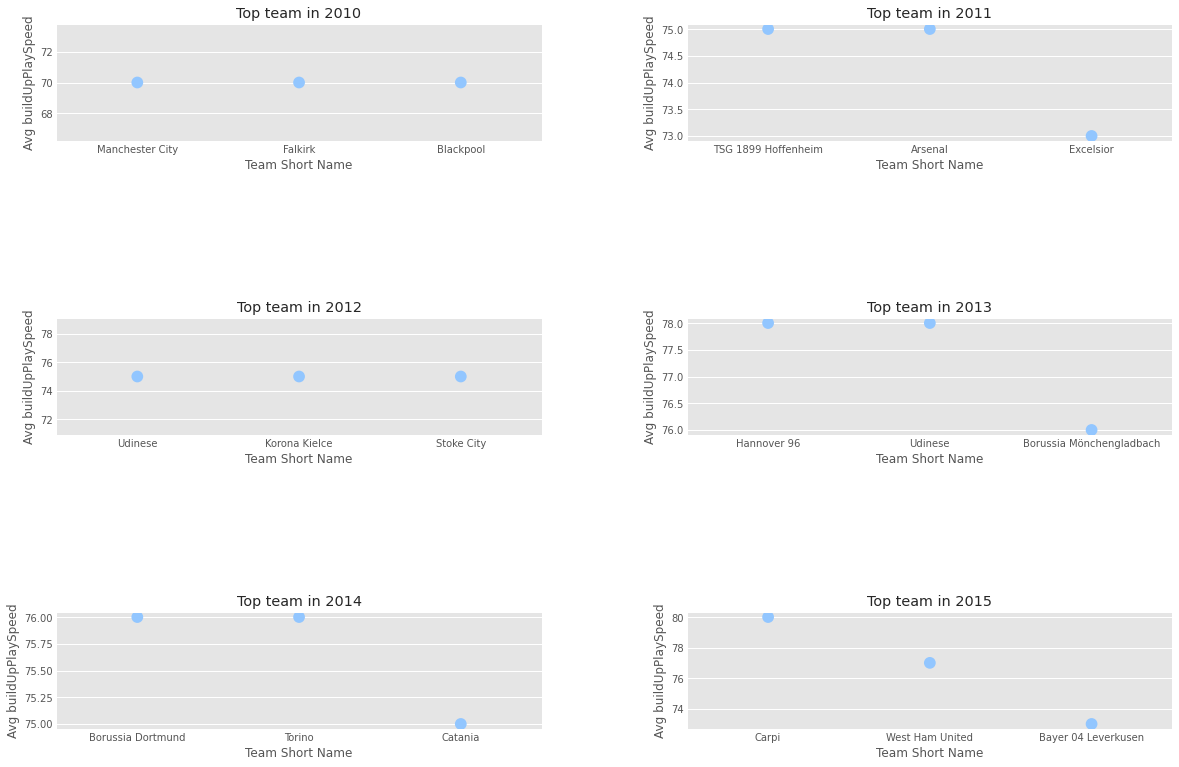

In [ ]:
team_group['buildUpPlaySpeed'].min().sort_values(ascending=False)

buildUpPlaySpeed = team_group['buildUpPlaySpeed'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_team_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(3,2,i)
    x = buildUpPlaySpeed[(buildUpPlaySpeed.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Team Short Name')
    plt.ylabel('Avg buildUpPlaySpeed')
    plt.title(f'Top team in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)


- #### Who is the top three teams in chanceCreationShooting from 2007 to 2016

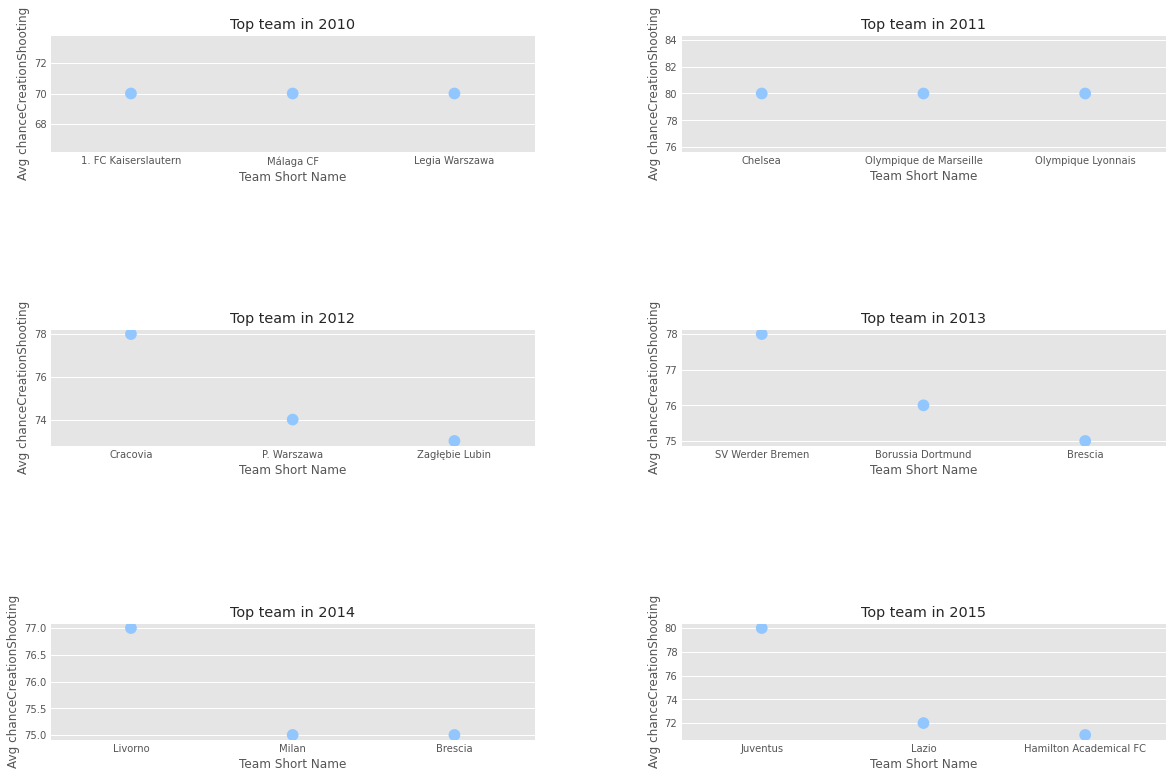

In [ ]:
team_group['chanceCreationShooting'].min().sort_values(ascending=False)

chanceCreationShooting = team_group['chanceCreationShooting'].mean()
plt.figure(figsize=(20,10))
plt.style.use('seaborn-pastel')
seasons = sorted(df_team_attr['season'].unique())
i = 1
for season in seasons:
    plt.subplot(3,2,i)
    x = chanceCreationShooting[(chanceCreationShooting.index.get_level_values(0) == season)].sort_values(ascending=False).iloc[:3]
    sns.pointplot(x=x.index.get_level_values(1), y=x.values, linestyles='')
    plt.xlabel('Team Short Name')
    plt.ylabel('Avg chanceCreationShooting')
    plt.title(f'Top team in {season}')
    i+=1
    
    
# plt.tight_layout()
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.3)


## Conclusions

1. we can see that there are linear relationship between weight and height
2. we can see that the top 4 league (English, spain, italy and france) plays matches then other leagues
3. the season 2013/2014 has less matches then other seasons
4. The home Team score goals then Away team
5. 80% of player's weight below 180 pound
6. 80% of player's height below 185 c/m
7. most of player's age between 23 to 30

### Limitation
1. mising the position of the players or in other way the role of its player in the game.
2. Not knowing whom player belongs to which team is another big limitation in this dataset.